## Studio in frequenza di un onda fatta dalla somma di 3 Sinusoidi con frequenza diversa

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fft, signal

### Varibili per creare le onde nel tempo

In [2]:
# Frenquenza in Hz
freq = 0
#Durata in secondi
durata = 1
#frequenza campionamento (al secondo)
fs = 100
#array per il tempo
t = np.linspace(0, durata, int(fs*durata))

## Creazione delle onde e plot

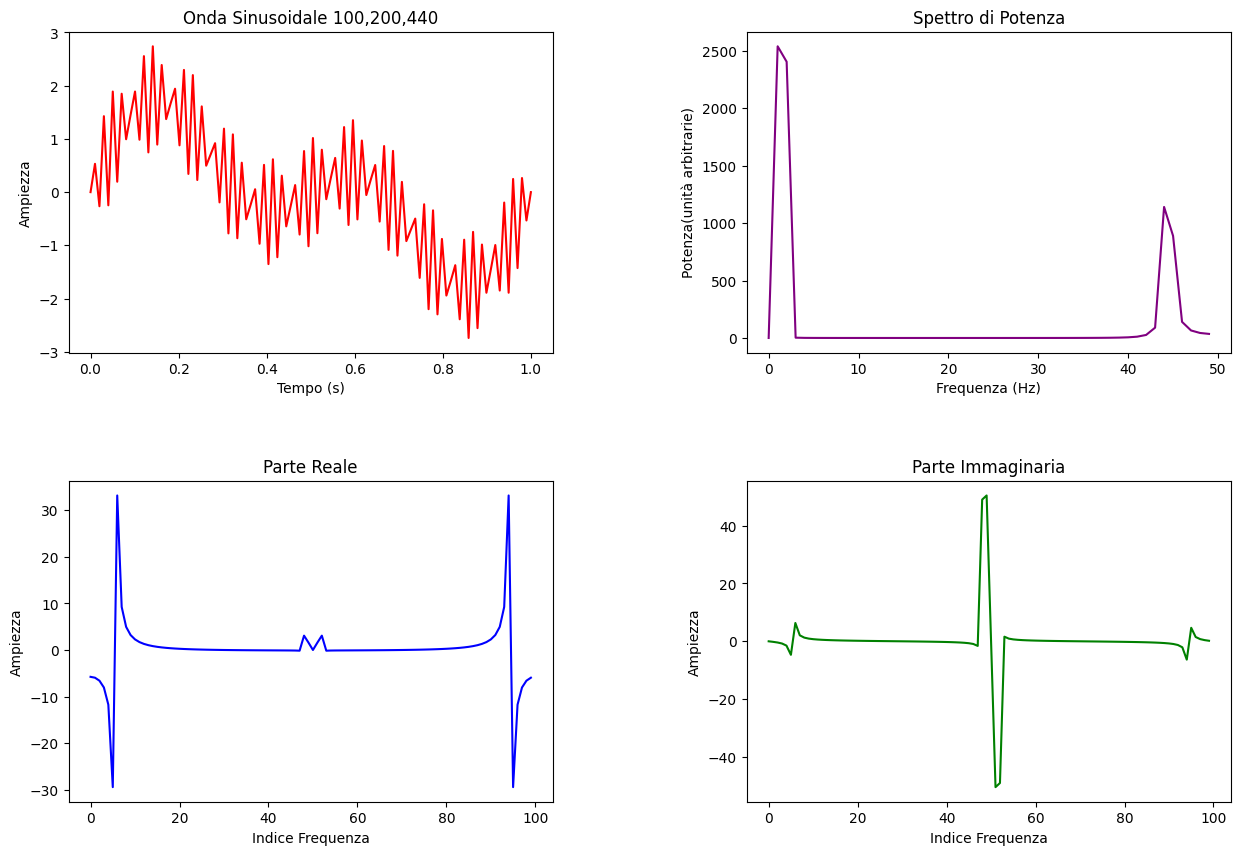

In [3]:
#creo le onde a vari hz
freq = 100
sin1 = np.sin(2*np.pi*freq*t)

freq = 200
sin2 = np.sin(2*np.pi*freq*t)

freq = 440
sin3 = np.sin(2*np.pi*freq*t)

# Somma delle 3 onde
sin_sum = sin1 + sin2 + sin3

# Trasformata onda Sin 
ft_sin_sum = fft.fft(sin_sum)

# spettro di potenza
power_spectrum = np.abs(ft_sin_sum[:len(sin_sum)//2])**2

# plot
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Onda nel tempo
ax[0][0].plot(t, sin_sum, "r")
ax[0][0].set_title(f"Onda Sinusoidale 100,200,440")
ax[0][0].set_xlabel("Tempo (s)")
ax[0][0].set_ylabel("Ampiezza")

# Spettro di potenza
ax[0][1].plot(power_spectrum, "purple")
ax[0][1].set_title("Spettro di Potenza")
ax[0][1].set_xlabel("Frequenza (Hz)")
ax[0][1].set_ylabel("Potenza(unit√† arbitrarie)")

# Parte reale ft (pari)
ax[1][0].plot(np.fft.fftshift(np.real(ft_sin_sum)), "b")
ax[1][0].set_title("Parte Reale")
ax[1][0].set_xlabel("Indice Frequenza")
ax[1][0].set_ylabel("Ampiezza")

# Parte immaginaria ft (dispari)
ax[1][1].plot(np.fft.fftshift(np.imag(ft_sin_sum)), "g")
ax[1][1].set_title("Parte Immaginaria")
ax[1][1].set_xlabel("Indice Frequenza")
ax[1][1].set_ylabel("Ampiezza")

plt.show()